In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [3]:
weather=pd.read_csv('./data/weatherHistory.csv')
weather.head(4)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.


In [4]:
df = weather[['Humidity','Wind Speed (km/h)', 'Pressure (millibars)','Temperature (C)', 'Wind Bearing (degrees)']]
#target value
Y = df[['Temperature (C)']]
#explanatory variables
X = df[['Humidity','Wind Speed (km/h)', 'Pressure (millibars)', 'Wind Bearing (degrees)']]

In [79]:
lrm = linear_model.LinearRegression()
lrm.fit(X,Y)
tahmin = lrm.predict(X)
print('Değişkenler:', lrm.coef_)
print('Sabit değer (bias): ', lrm.intercept_)

Değişkenler: [[-3.24962454e+01 -2.01413742e-01 -6.91759209e-04  4.04836936e-03]]
Sabit değer (bias):  [37.92643819]


In [5]:
lrm=linear_model.LinearRegression()
lrm.fit(X,Y)
predictions = lrm.predict(X)

In [6]:
print('\n Coefficients: \n', lrm.coef_)
print('\n Intercept: \n', lrm.intercept_)


 Coefficients: 
 [[-3.24962454e+01 -2.01413742e-01 -6.91759209e-04  4.04836936e-03]]

 Intercept: 
 [37.92643819]


In [7]:
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:17:19   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     37.9264      0.233    162.709      0.000      37.470      38.383
Humidity                 -32.4962      0.123   -264.288      0.000     -32.737     -32.255
Wind Speed (km/h)         -0.2014      0.003    -57.557      0.000      -0.208      -0.195
Pressure (millibars)      -0.0007      0.000     -3.452      0.001      -0.001      -0.000
Wind Bearing (degrees)     0.0040      0.000     18.463      0.000       0.004       0.004
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 1. Assumption one: linearity of the model in the coefficients

ValueError: x and y must be the same size

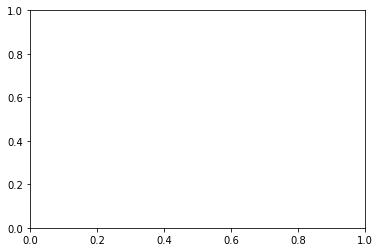

In [8]:
plt.scatter(X, predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Linear regression can capture quadratic relationship')
plt.show()

## 2. Assumption two: the error term should be zero on average

In [9]:
errors = Y - predictions

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: Temperature (C)    4.686416e-15
dtype: float64


## 3. Assumption three: homoscedasticity

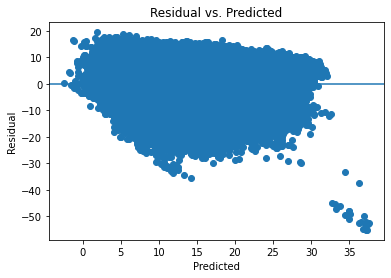

In [10]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

## Bartlett And Levene Tests

In [22]:
errors=errors.to_numpy()
errors

array([[2.99742891],
       [1.90301865],
       [1.04115028],
       ...,
       [4.70095   ],
       [5.83612254],
       [4.06381991]])

In [24]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {} and p value is {}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {} and p value is {}".format(lev_stats[0], lev_stats[1]))

ValueError: Samples must be one-dimensional.

## 4. Assumption four: low multicollinearity

In [26]:
weather_corr=df.corr()
weather_corr

,Humidity,Wind Speed (km/h),Pressure (millibars),Temperature (C),Wind Bearing (degrees)
Humidity,1.000000,-0.224951,0.005454,-0.632255,0.000735
Wind Speed (km/h),-0.224951,1.000000,-0.049263,0.008957,0.103822
Pressure (millibars),0.005454,-0.049263,1.000000,-0.005447,-0.011651
Temperature (C),-0.632255,0.008957,-0.005447,1.000000,0.029988
Wind Bearing (degrees),0.000735,0.103822,-0.011651,0.029988,1.000000


## 5. Assumption five: error terms should be uncorrelated with one other

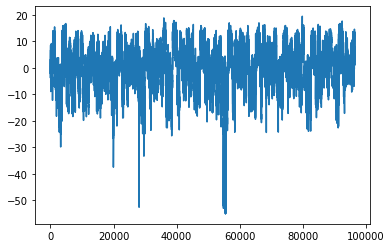

In [27]:
plt.plot(errors)
plt.show()

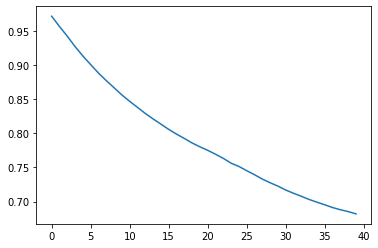

In [28]:
from statsmodels.tsa.stattools import acf

acf_data= acf(errors)

plt.plot(acf_data[1:])
plt.show()

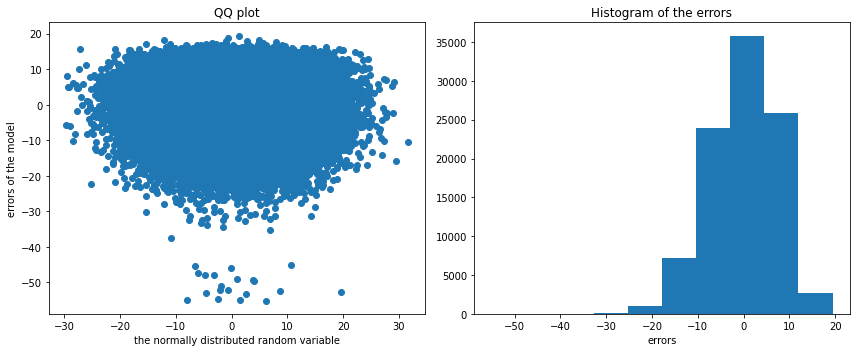

In [29]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, errors)
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [30]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 3793.296735252356 and p value is 0.0
Normality test statistics is [3375.4323077] and p value is [0.]
